<img src="img/Auswahl_2016-05-12_001.png"/>

### Groupname: Gruppe 5

<table align="left" style="border-style: hidden; border-collapse: collapse">
  <tr>
    <td>Arne Siebenmorgen</td>
    <td>330529</td>
  </tr>
  <tr>
    <td>Holger Prang </td>
    <td>WM</td>
  </tr>
  <tr>
    <td>Eugene Reese</td>
    <td>319776</td>
  </tr>
  <tr>
    <td>Jens Meiners</td>
    <td>332697</td>
  </tr>
</table>

In [10]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import colorbar
import scipy
import os
from scipy import misc

In [12]:
def pca(data, axis=0, center=True, normalize=False):
    mu = data.mean(axis=axis)
    if center:
        data = data - mu
    if normalize:
        data = (data - mu)/data.std(axis=axis)
    eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
    return eigenvectors, eigenvalues

def project(data, eigenvectors, axis=0):
    projected_data = np.dot(data, eigenvectors)
    sigma = projected_data.std(axis=axis).mean()
    return projected_data, sigma

<img src="img/Auswahl_2016-05-12_002.png"/>

<img src="img/Auswahl_2016-05-12_003.png"/>

<img src="img/Auswahl_2016-05-12_004.png"/>

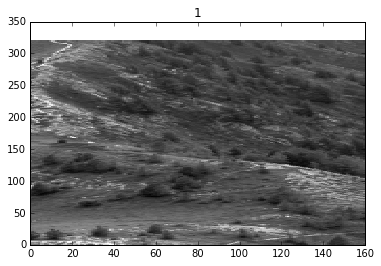

In [18]:
img = scipy.misc.imread('imgpca/n9.jpg')

imgCrop = img[10:10+320, 50:50+160]

plt.pcolor(imgCrop[::-1], cmap=plt.get_cmap('gray'))
plt.title(n)
plt.show()

imgSamples = np.zeros(shape=(((imgCrop.shape[0]*imgCrop.shape[1])/(20*10),20*10)))

for i in range(imgSamples.shape[0]):
    xIndex = (i%(((imgCrop.shape[0]+1))/20))*20
    yIndex = (i/(((imgCrop.shape[0]+1))/20))*10
    imgSample = imgCrop[xIndex:xIndex+20,yIndex:yIndex+10]
    imgSamples[i] = imgSample.ravel()

<img src="img/Auswahl_2016-05-12_005.png"/>

In [24]:
#do SVD
eigenvectors, eigenvalues, V = np.linalg.svd(imgSamples, full_matrices=False)

<img src="img/Auswahl_2016-05-12_006.png"/>
<img src="img/Auswahl_2016-05-12_007.png"/>

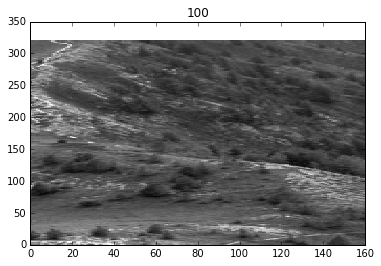

6.56697416035


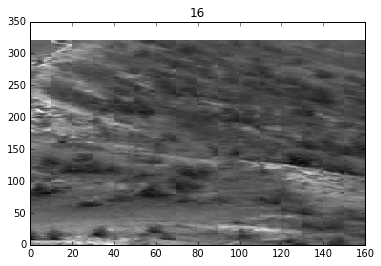

116.476711819


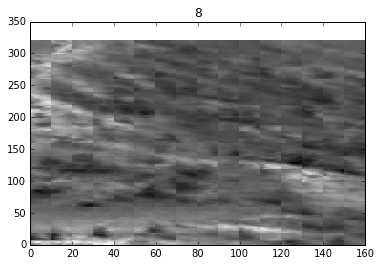

173.104988358


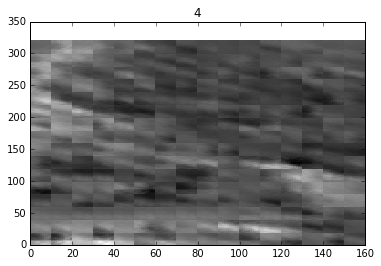

233.319954006


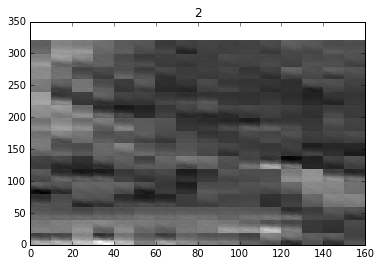

303.470826702


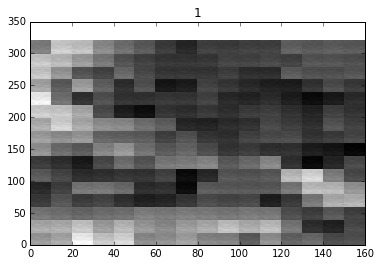

405.984522647


In [25]:
def stichImg(imageShape, imgData):    
    imgStich = np.zeros(imageShape)
    for i in range(imgData.shape[0]):
        xIndex = (i%(((imageShape[0]+1))/20))*20
        yIndex = (i/(((imageShape[0]+1))/20))*10
        #print xIndex, yIndex
        imgSample = imgData[i].reshape((20,10))
        imgStich[xIndex:xIndex+20,yIndex:yIndex+10] = imgSample        
    return imgStich

def meansqerr(img1, img2):
    return ((img1 - img2) ** 2).mean()

nDef = [100,16,8,4,2,1]
eigenvaluesComp = eigenvalues
for n in nDef:
    eigenvaluesComp[n:] = 0
    pcaData = np.dot(eigenvectors, np.dot(np.diag(eigenvaluesComp), V))
    stich = stichImg(imgCrop.shape,pcaData)
    plt.pcolor(stich[::-1], cmap=plt.get_cmap('gray'))
    plt.title(n)
    plt.show()
    print meansqerr(imgCrop,stich)

<img src="img/Auswahl_2016-05-12_008.png"/>

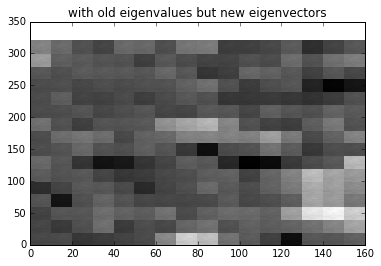

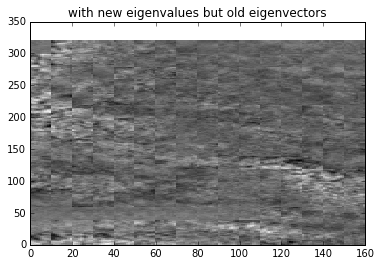

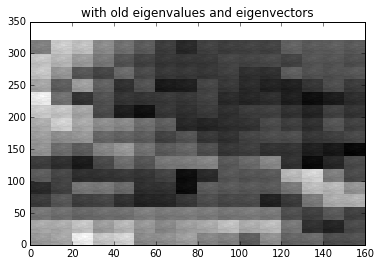

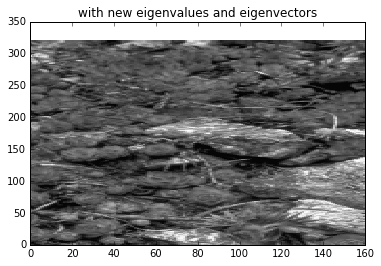

In [21]:
img2 = scipy.misc.imread('imgpca/n4.jpg')
imgCrop2 = img2[10:10+320, 50:50+160]
imgSamples2 = np.zeros(shape=(((imgCrop2.shape[0]*imgCrop2.shape[1])/(20*10),20*10)))
for i in range(imgSamples2.shape[0]):
    xIndex = (i%(((imgCrop2.shape[0]+1))/20))*20
    yIndex = (i/(((imgCrop2.shape[0]+1))/20))*10
    imgSample2 = imgCrop2[xIndex:xIndex+20,yIndex:yIndex+10]
    imgSamples2[i] = imgSample2.ravel()
    
eigenvectors2, eigenvalues2, V2 = np.linalg.svd(imgSamples2, full_matrices=False)

pcaData2 = np.dot(eigenvectors2, np.dot(np.diag(eigenvalues), V2))
stich = stichImg(imgCrop2.shape,pcaData2)
plt.pcolor(stich[::-1], cmap=plt.get_cmap('gray'))
plt.title('with old eigenvalues but new eigenvectors')
plt.show()

pcaData2 = np.dot(eigenvectors, np.dot(np.diag(eigenvalues2), V2))
stich = stichImg(imgCrop2.shape,pcaData2)
plt.pcolor(stich[::-1], cmap=plt.get_cmap('gray'))
plt.title('with new eigenvalues but old eigenvectors')
plt.show()

pcaData2 = np.dot(eigenvectors, np.dot(np.diag(eigenvalues), V2))
stich = stichImg(imgCrop2.shape,pcaData2)
plt.pcolor(stich[::-1], cmap=plt.get_cmap('gray'))
plt.title('with old eigenvalues and eigenvectors')
plt.show()

pcaData2 = np.dot(eigenvectors2, np.dot(np.diag(eigenvalues2), V2))
stich = stichImg(imgCrop2.shape,pcaData2)
plt.pcolor(stich[::-1], cmap=plt.get_cmap('gray'))
plt.title('with new eigenvalues and eigenvectors')
plt.show()

<img src="img/Auswahl_2016-05-12_009.png"/>

<img src="img/Auswahl_2016-05-12_010.png"/>

In [3]:
from numpy import genfromtxt 
#laden: 
data = genfromtxt('data-onlinePCA.txt',delimiter=',',skip_header=1)[:,1:]
print(data)
print data.shape

[[-0.00973418  0.22449331]
 [ 0.04644704  1.57767475]
 [-0.09561311 -0.44307315]
 ..., 
 [ 0.35847142  0.05304116]
 [ 0.06795932 -0.30740138]
 [ 0.34733715 -0.16080763]]
(2000, 2)


<img src="img/Auswahl_2016-05-12_011.png"/>

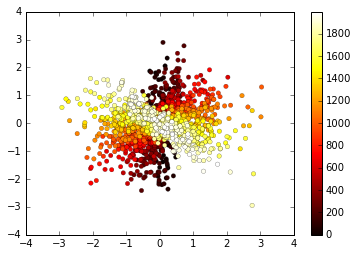

In [109]:
color = np.arange(0,2000)
plt.scatter(data[:,0], data[:,1],c=color, cmap=mpl.cm.hot, lw=0.2)
colorbar()

<img src="img/Auswahl_2016-05-12_012.png"/>

In [31]:
vecs, vals = pca(data)
print 'eigenvectors:\n'+str(vecs)
print vals

eigenvectors:
[[-0.94178963 -0.33620276]
 [-0.33620276  0.94178963]]
[ 34.9286469  29.2176225]


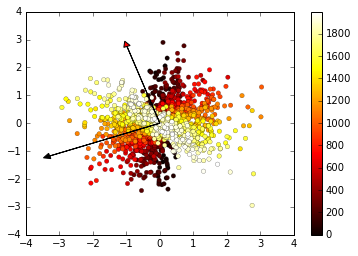

In [110]:
plt.scatter(data[:,0], data[:,1],c=color, cmap=mpl.cm.hot, lw=0.2)
colorbar()
firstPCscale = vals[0] / 10
plt.arrow(0, 0, firstPCscale*vecs[0,0], firstPCscale*vecs[1,0], head_width=0.2, head_length=0.2, fc='k', ec='k')
secondPCscale = vals[1] / 10
plt.arrow(0, 0, secondPCscale*vecs[0,1], secondPCscale*vecs[1,1], head_width=0.2, head_length=0.2, fc='r', ec='k')

plt.show()

Note that the Eigenvectors are scaled by a tenth of their corresponding Eigenvalues. The black headed arrow denotes the first PC while the red headed respresents the second PC.

<img src="img/Auswahl_2016-05-12_013.png"/>

Oja's rule:<br>
$$w_i (t + 1) = w_i (t) + \eta y(t)[x_i (t) - y(t)w_i(t)]$$

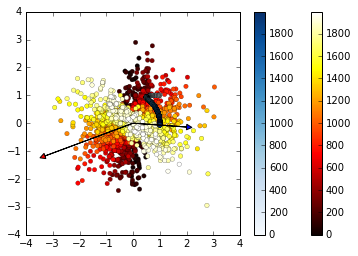

last weight of the iteration:
[[ 0.99889268]
 [-0.0688022 ]]


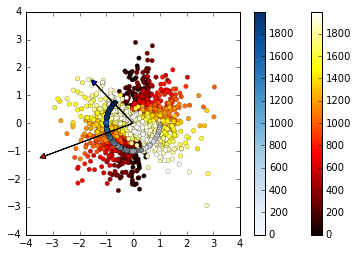

last weight of the iteration:
[[-0.70861556]
 [ 0.70617535]]


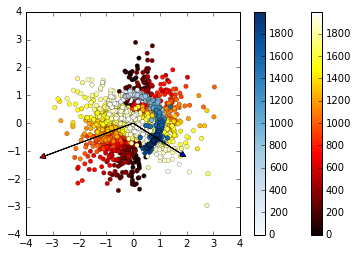

last weight of the iteration:
[[ 0.89770689]
 [-0.54743815]]


In [132]:
etas = [0.002, 0.04, 0.45]
arrowscale = 2
firstPCscale = vals[0] / 10
w = np.ones((2,1))
y = 0
weights = np.zeros((data.shape))


for eta in etas:
    for i, x in enumerate(data):
        x = np.atleast_2d(x).T
        y = w.T.dot(x)[0,0]
        w = w + eta * y* (x - y * w)
        weights[i] = w.T
    plt.scatter(data[:,0], data[:,1],c=color, cmap=mpl.cm.hot, lw=0.2)
    colorbar()
    plt.scatter(weights[:,0], weights[:,1],c=color, cmap=mpl.cm.Blues,lw=0.2)
    colorbar()
    plt.arrow(0, 0, firstPCscale*vecs[0,0], firstPCscale*vecs[1,0], head_width=0.2, head_length=0.2, fc='r', ec='k')
    plt.arrow(0, 0, arrowscale*w[0,0], arrowscale*w[1,0], head_width=0.2, head_length=0.2, fc='b', ec='k')
    plt.show()
    print 'last weight of the iteration:'
    print w

In [131]:
print 'original first PC from PCA:'
print vecs[:,0]

original first PC from PCA:
[-0.94178963 -0.33620276]


Description of the plots:  
The warm colored datapoints represent the original dataset. The blue shaded points originate from the weights of Oja's rule. For every plot there are two vectors plottet onto the datapoints. The read headed arrow denotes the original first PC that resulted from the PCA. The blue headed points into the direktion of the last weight that was calculated using Oja's rule. The color bars indicate the timestamp.

We can see, that the weights of Oja's are more or less twisting clockwise like the direction of highest variance does in the original data. It is very nice to see that the PC from an SVD does not encorporate the time dependence of the variance like Oja's weights do. The SVD PC points into the direction of maximal variance over all datapoints. For Oja's rule, the learning rate $\eta$ is a crucial parameter for learning in the same pace as the data changes. We can see that in the first of the three plots where $\eta$ is rather low. As a result, the weights are tumbling behind the spinning variance because the newly learned values are scaled down by the learning rate. To high learning rates seem to result in fuzzy weights that tend to nervously jump around as seen in plot 3. Plot 2 on the other hand hast a medium learning rate and draws a nice circle following the direction of maximal variance. For the first two plots, the weights do not start off very well, but that is because of the weights initialization of a vector containing just ones.